In [566]:
# import sys
# !{sys.executable} -m pip install --upgrade tensorflow 
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import glacierml as gl
import numpy as np
import warnings
from tensorflow.python.util import deprecation
import os
import logging
import seaborn as sns
import janitor
import tabulate
from tqdm import tqdm
from IPython.display import display, HTML
# display(HTML("<style>.container { width:85% !important; }</style>"))
tf.get_logger().setLevel(logging.ERROR)
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
deprecation._PRINT_DEPRECATION_WARNINGS = False
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
pd.set_option('display.max_columns', None)

RS = range(0,25,1)


In [594]:
Glam = pd.read_csv('Glam.csv')
Glam = Glam[[
#         'LAT',
#         'LON',
    'CenLon',
    'CenLat',
    'Area',
    'thickness',
    'Slope',
    'Zmin',
    'Zmed',
    'Zmax',
    'Aspect',
    'Lmax'
]]

Glam_2 = pd.read_csv('Glam_2.csv')
Glam_2 = Glam_2[[
#         'LAT',
#         'LON',
    'CenLon',
    'CenLat',
    'Area',
    'thickness',
    'Slope',
    'Zmin',
    'Zmed',
    'Zmax',
    'Aspect',
    'Lmax'
]]


Glam_phys = Glam[[
#         'LAT',
#         'LON',
#     'CenLon',
#     'CenLat',
    'Area',
    'thickness',
    'Slope',
    'Zmin',
    'Zmed',
    'Zmax',
    'Aspect',
    'Lmax'
]]

predictions_Glam = pd.read_csv('zults/predictions_Glam.csv')
predictions_Glam_phys = pd.read_csv('zults/predictions_Glam_phys.csv')


deviations_Glam = pd.read_csv('zults/deviations_Glam.csv')
deviations_Glam = deviations_Glam[[
    'layer architecture',
    'model parameters',
    'learning rate',
    'validation split',
    'epochs',
    'test mae avg',
    'train mae avg',
    'test mae std dev',
    'train mae std dev',
    'test predicted thickness std dev',
    'train predicted thickness std dev'
]]


deviations_Glam_2 = pd.read_csv('zults/deviations_Glam_2.csv')
deviations_Glam_2 = deviations_Glam_2[[
    'layer architecture',
    'model parameters',
    'learning rate',
    'validation split',
    'epochs',
    'test mae avg',
    'train mae avg',
    'test mae std dev',
    'train mae std dev',
    'test predicted thickness std dev',
    'train predicted thickness std dev'
]]


deviations_Glam_phys = pd.read_csv('zults/deviations_Glam_phys.csv')
deviations_Glam_phys = deviations_Glam_phys[[
#         'LAT',
#         'LON',
    'layer architecture',
    'model parameters',
    'learning rate',
    'validation split',
    'epochs',
    'test mae avg',
    'train mae avg',
    'test mae std dev',
    'train mae std dev',
    'test predicted thickness std dev',
    'train predicted thickness std dev'
]]


deviations_glacier = pd.read_csv('zults/deviations_glacier.csv')
deviations_glacier = deviations_glacier[[
#         'LAT',
#         'LON',
    'layer architecture',
    'model parameters',
    'learning rate',
    'validation split',
    'epochs',
    'test mae avg',
    'train mae avg',
    'test mae std dev',
    'train mae std dev',
    'test predicted thickness std dev',
    'train predicted thickness std dev'
]]


RGI_prethicked_Glam = pd.read_csv('zults/RGI_predicted_Glam_10-5_0.001_300.csv')
RGI_prethicked_Glam = RGI_prethicked_Glam[[
#         'LAT',
#         'LON',
    'CenLon',
    'CenLat',
    'Area',
    'Slope',
    'Zmin',
    'Zmed',
    'Zmax',
    'Aspect',
    'Lmax',
    'avg predicted thickness',
    'predicted thickness std dev',
#     'variance'
]]

RGI_prethicked_Glam_2 = pd.read_csv('zults/RGI_predicted_Glam_2_10-5_0.001_300.csv')
RGI_prethicked_Glam_2 = RGI_prethicked_Glam_2[[
#         'LAT',
#         'LON',
    'CenLon',
    'CenLat',
    'Area',
    'Slope',
    'Zmin',
    'Zmed',
    'Zmax',
    'Aspect',
    'Lmax',
    'avg predicted thickness',
    'predicted thickness std dev',
#     'variance'
]]

RGI_prethicked_Glam_phys = pd.read_csv('zults/RGI_prethicked_Glam_phys.csv')
RGI_prethicked_Glam_phys = RGI_prethicked_Glam_phys[[
#         'LAT',
#         'LON',
#     'CenLon',
#     'CenLat',
    'Area',
    'Slope',
    'Zmin',
    'Zmed',
    'Zmax',
    'Aspect',
    'Lmax',
    'avg predicted thickness',
    'predicted thickness std dev',
#     'variance'
]]



# Glam = pd.read_csv('Glam.csv')
# Glam = pd.read_csv('Glam.csv')
# Glam = pd.read_csv('Glam.csv')

loading and evaluating models...


100%|██████████| 150/150 [00:08<00:00, 17.26it/s]
/home/sa42/miniconda3/envs/python-cartopy-f/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


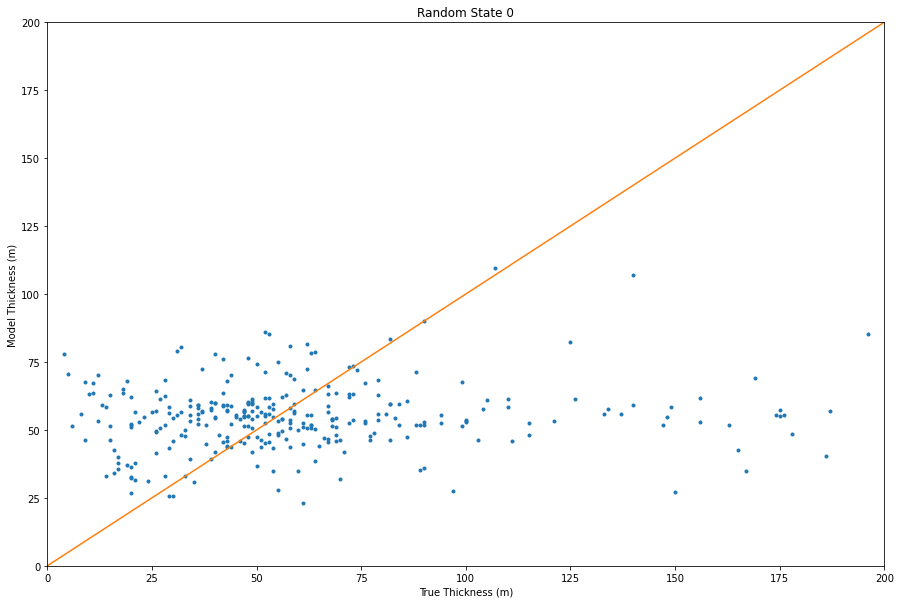

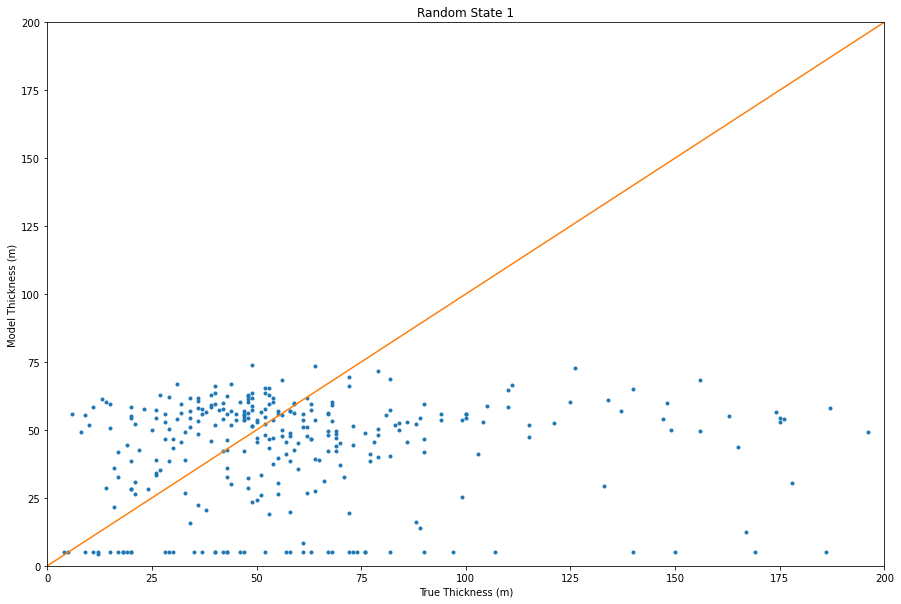

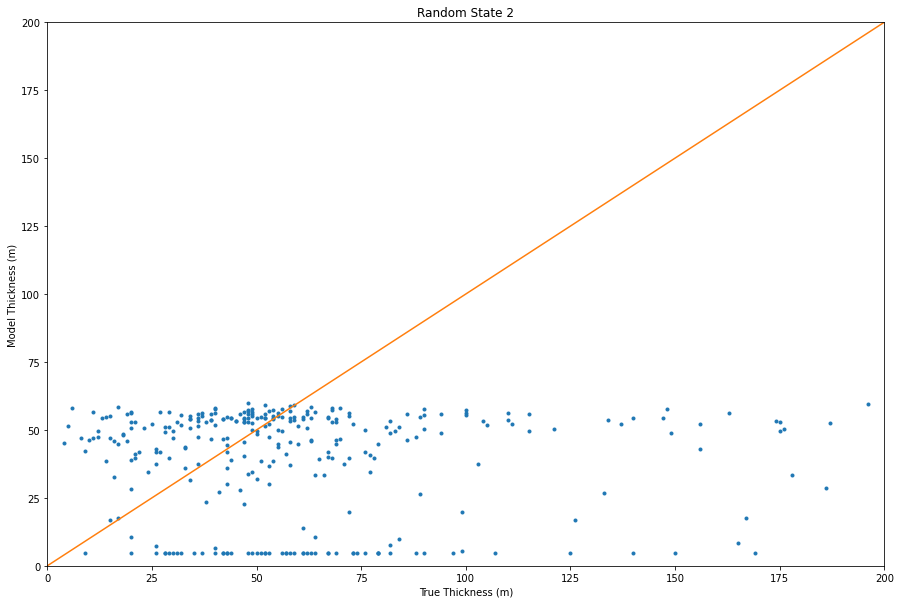

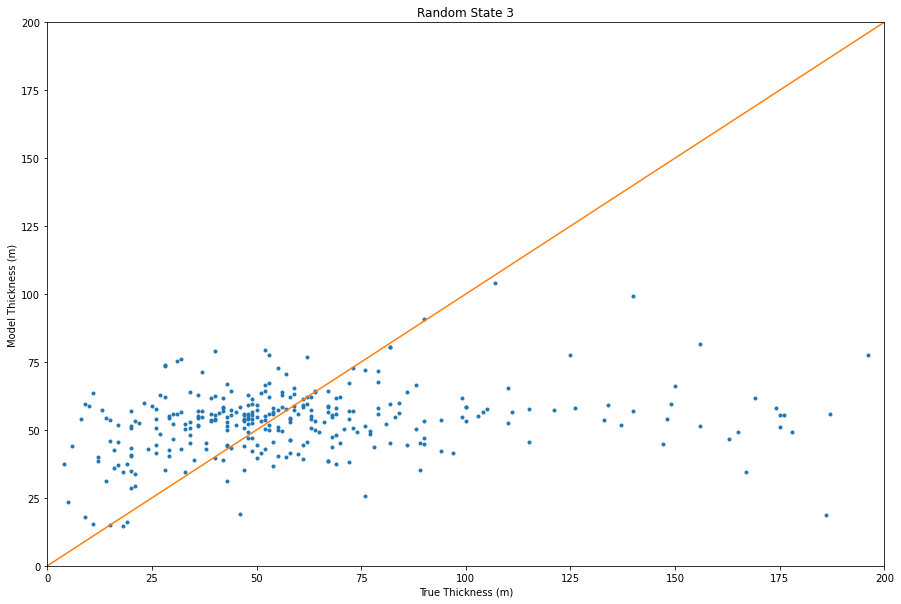

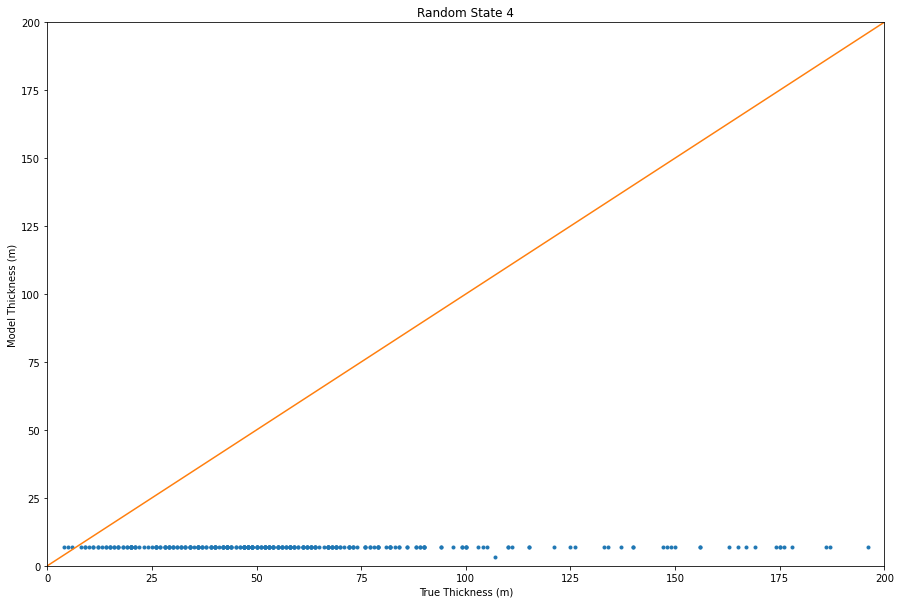

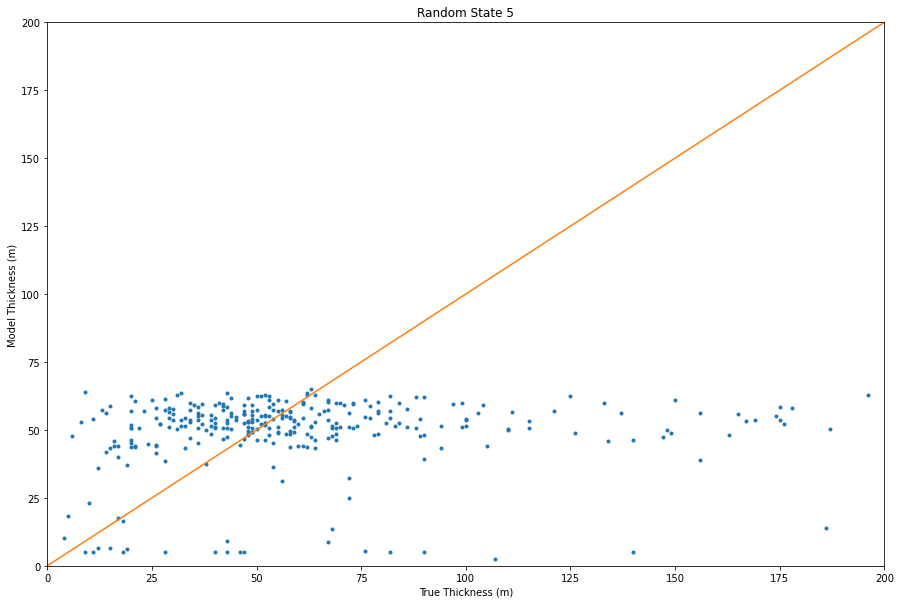

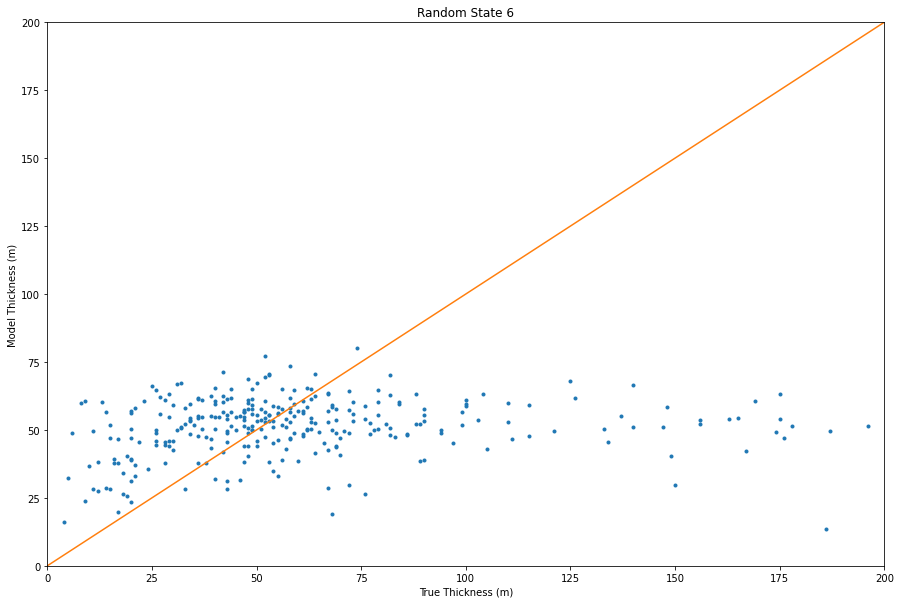

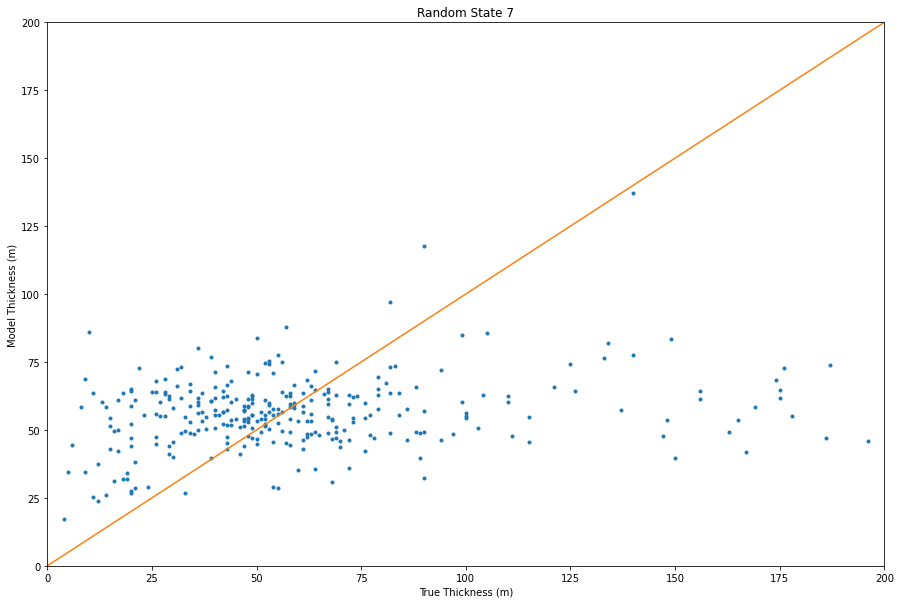

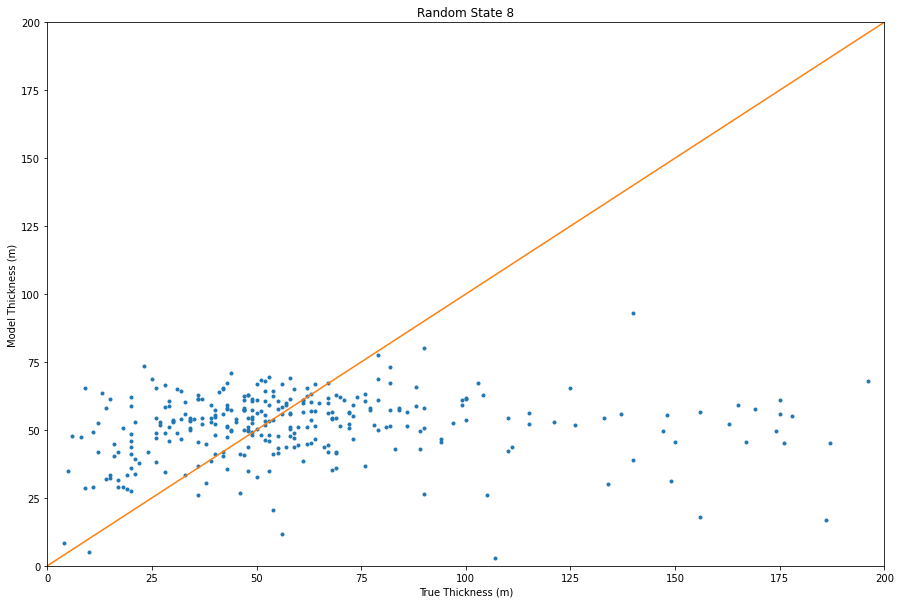

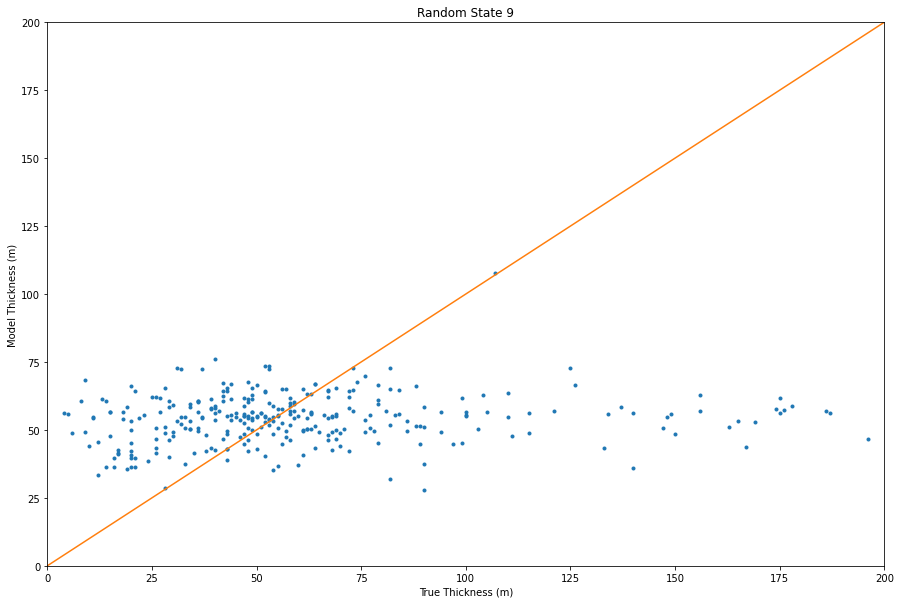

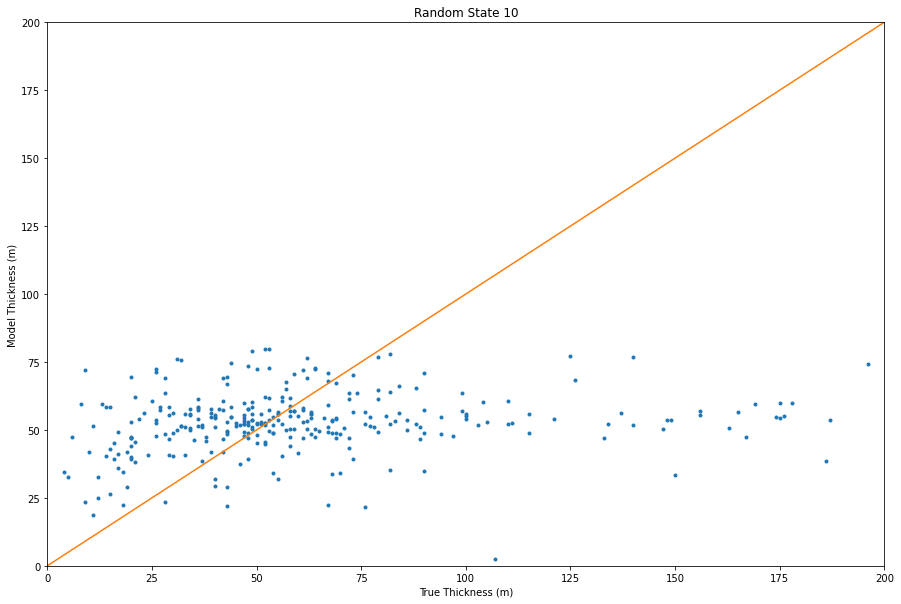

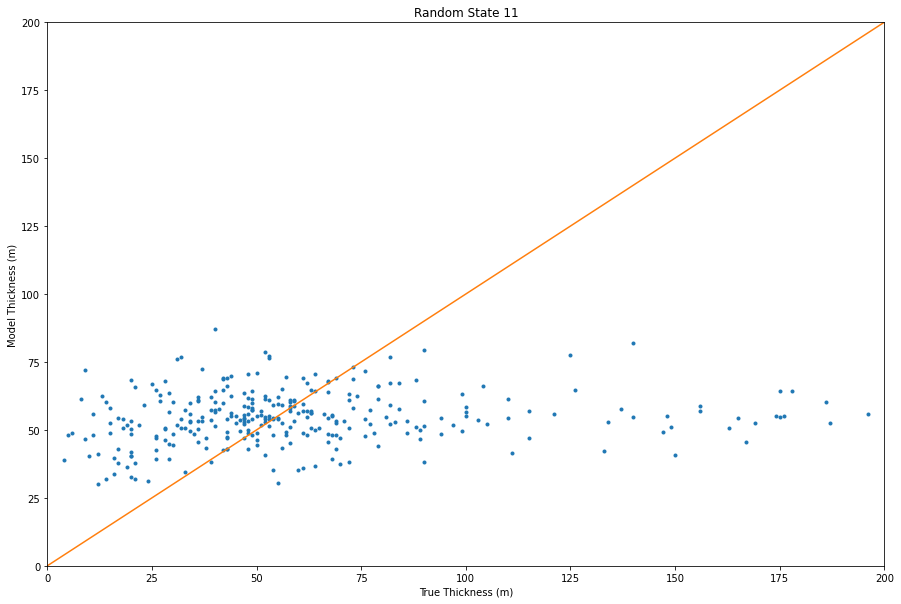

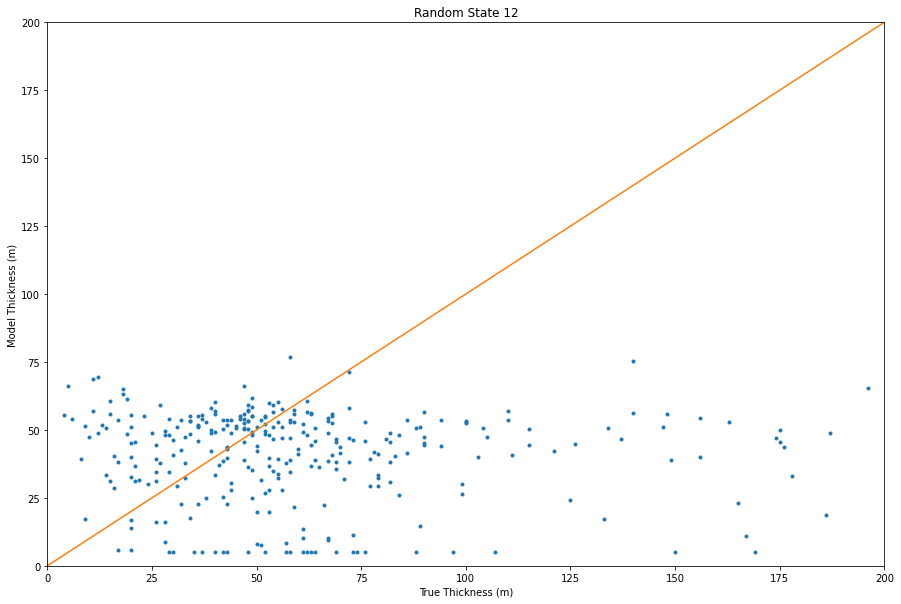

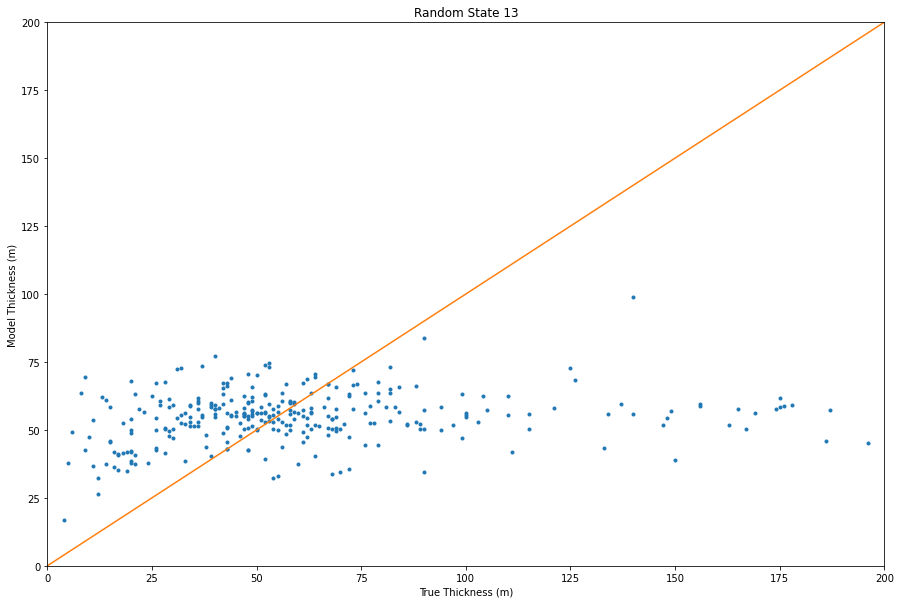

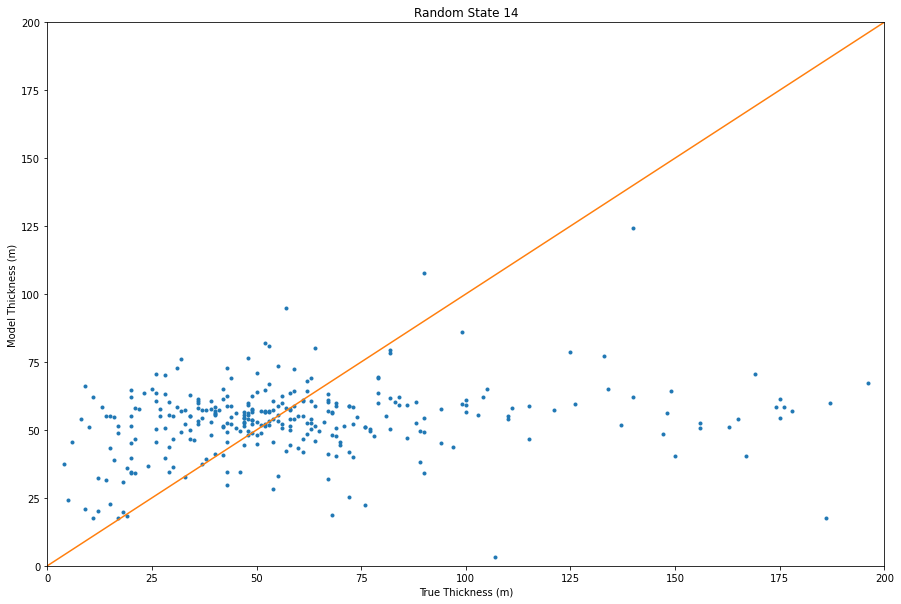

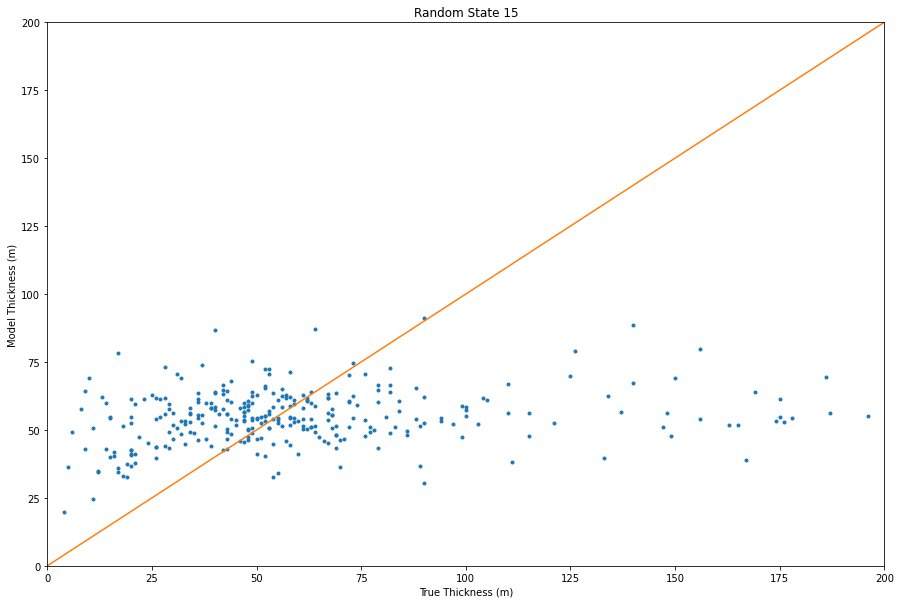

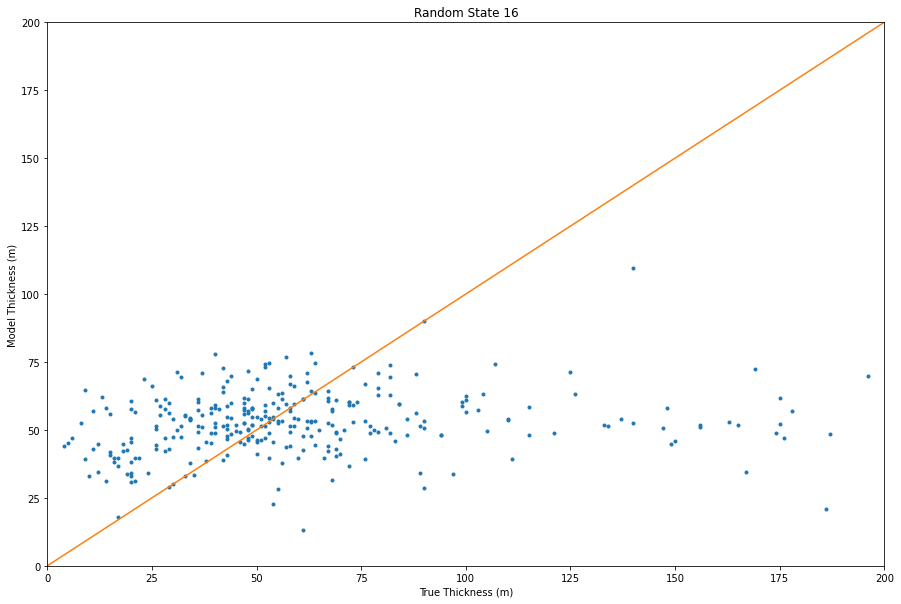

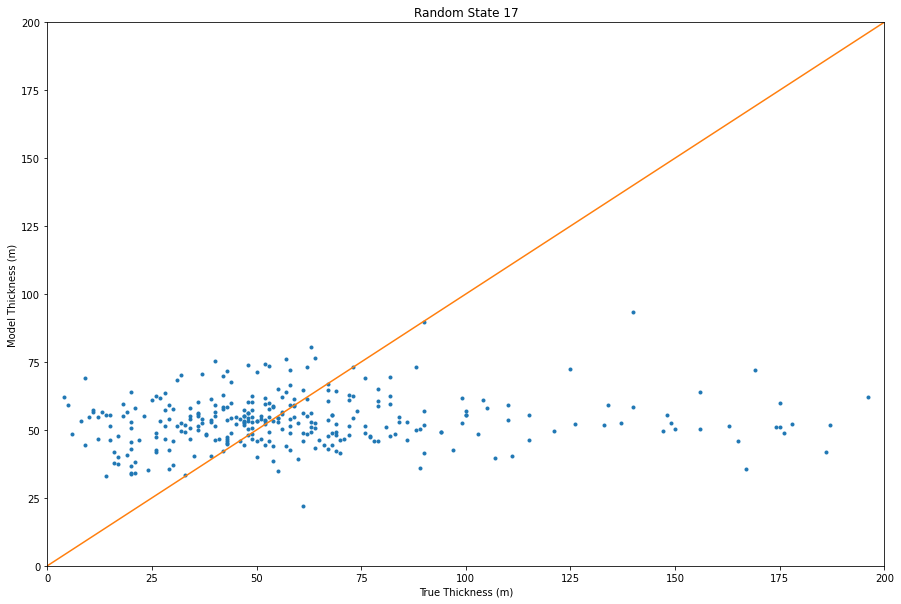

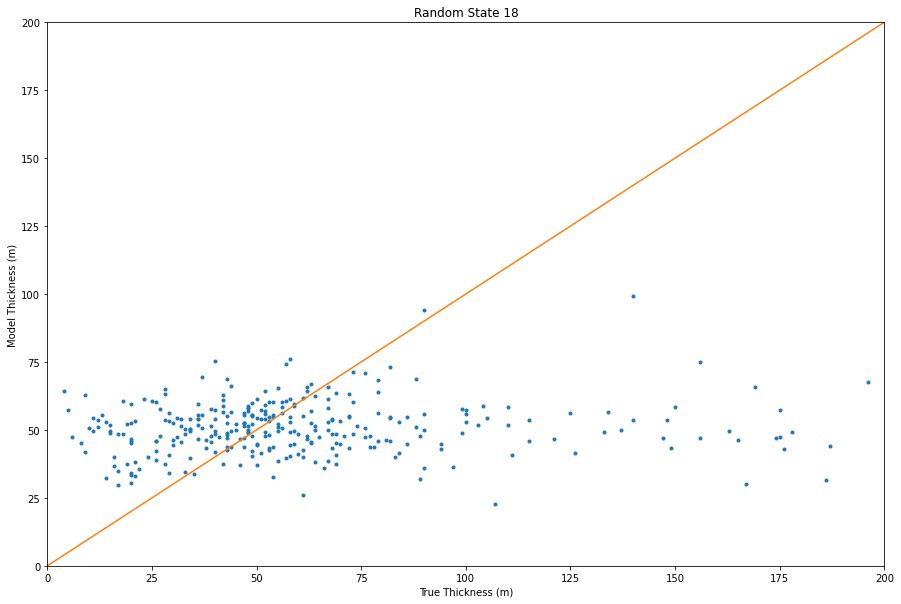

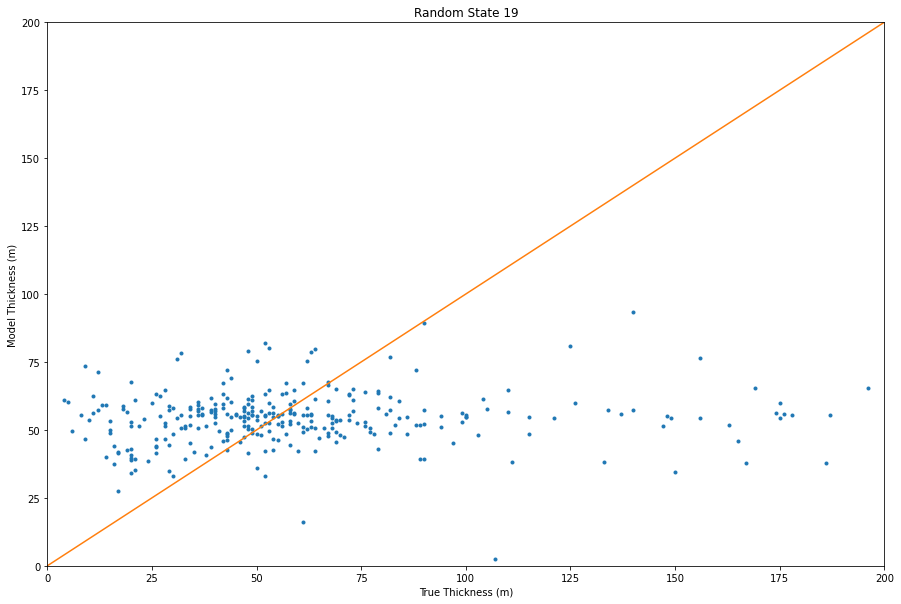

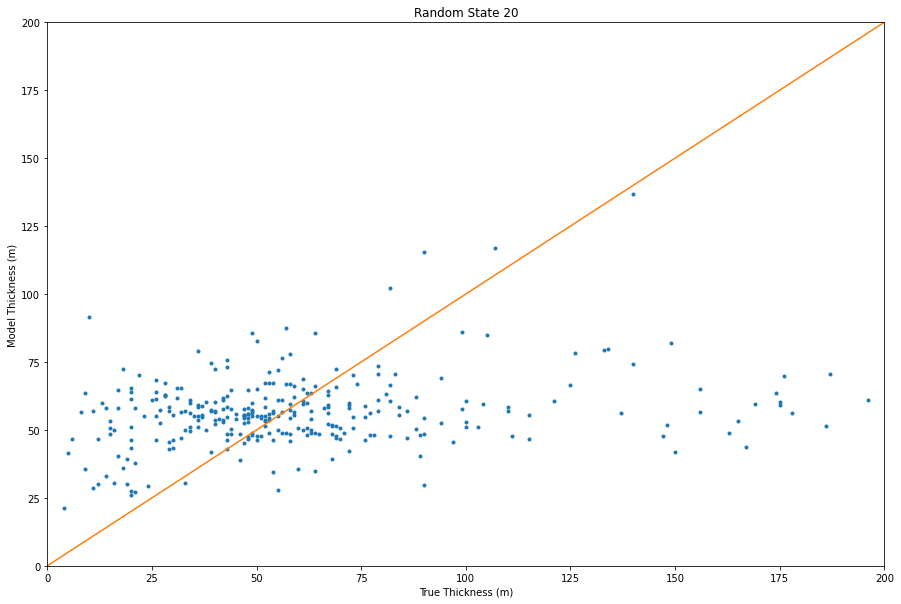

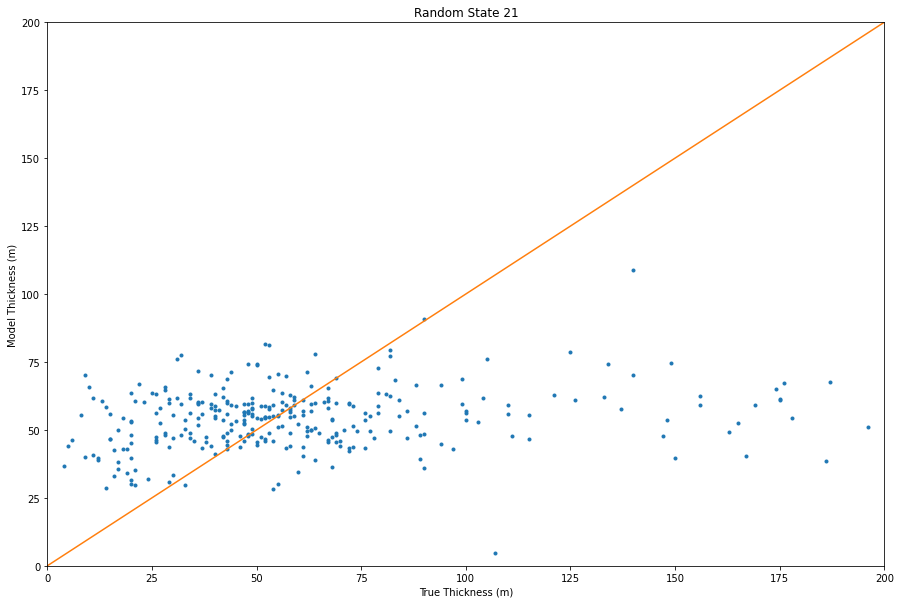

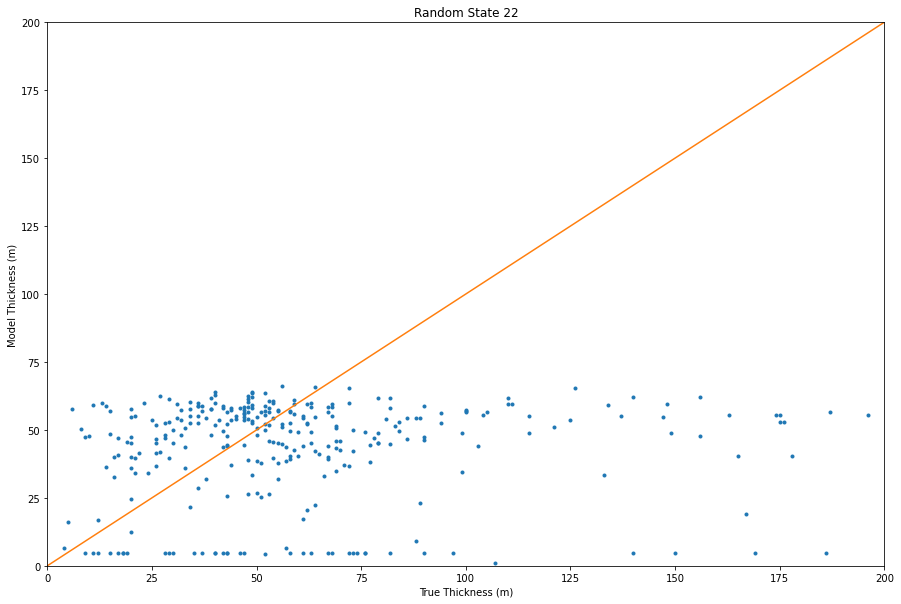

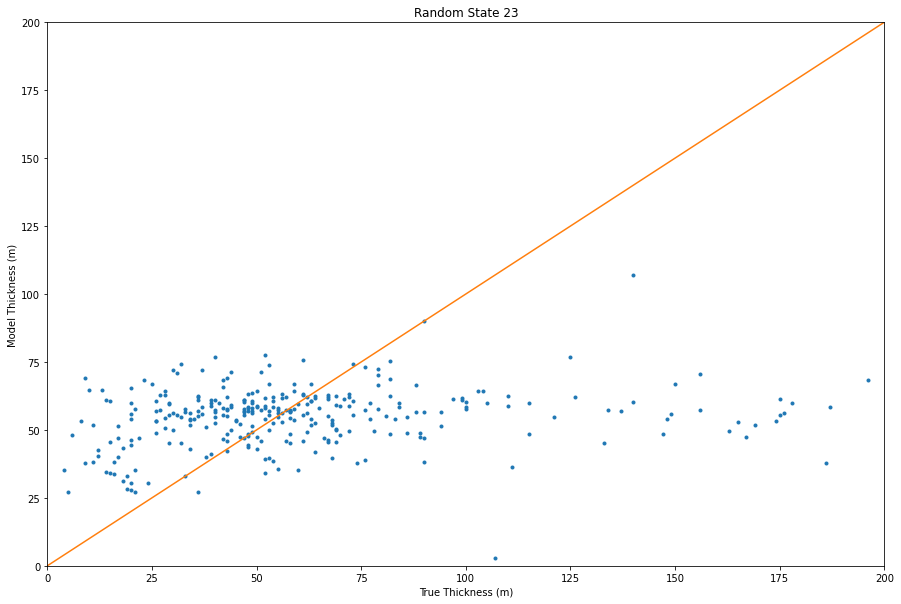

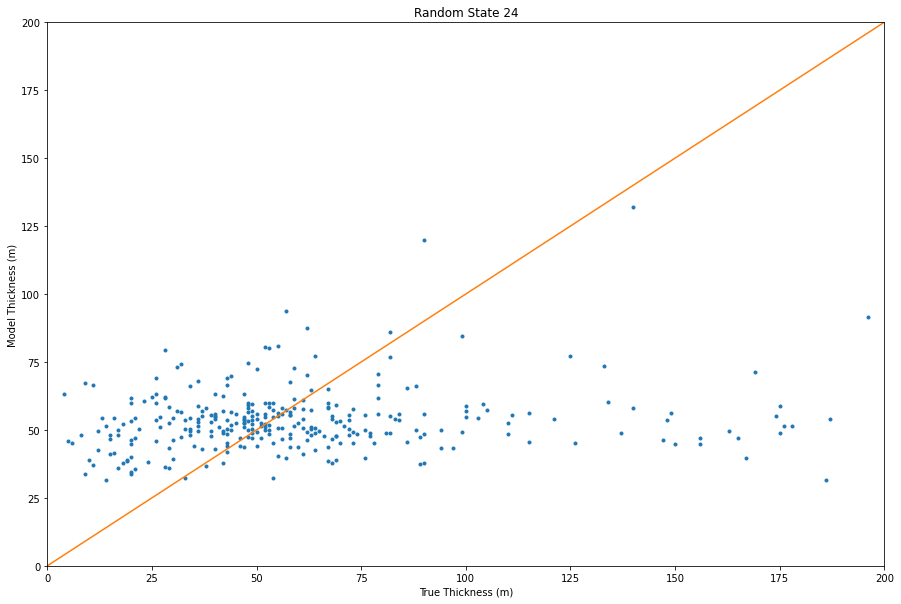

In [592]:
"""
Here we load top rated model and look at predicted accuracies of each random state
"""
arch = deviations_Glam_2['layer architecture'].loc[4]
top_learning_rate = deviations_Glam_2['learning rate'].loc[4]
dnn_model = {}
predictions = pd.DataFrame()
rootdir = 'saved_models/sm5/sm_' + arch + '/'
print('loading and evaluating models...')
for i in tqdm(os.listdir(rootdir)):
    if 'MULTI' in i and 'dnn' in i and str(top_learning_rate) in i:
        dnn_model[arch + '_' + i] = tf.keras.models.load_model(rootdir + i)

train_features, test_features, train_labels, test_labels = gl.data_splitter(Glam_2)
features = [train_features, test_features]
features = pd.concat(features)
labels = [train_labels, test_labels]
labels = pd.concat(labels)
for rs in RS:
    hhh = str(arch) + '_Glam_2_dnn_MULTI_' + str(top_learning_rate) + '_0.2_100_' + str(rs)
    y = dnn_model[hhh].predict(features, verbose = 0)
    fig,ax=plt.subplots(1,1,figsize=(15,10))
    fig.patch.set_facecolor('w')
    plt.plot(labels,y,'.')
    plt.plot((0,200),(0,200),'-')
    plt.xlabel('True Thickness (m)')
    plt.ylabel('Model Thickness (m)')
    ax.set_title('Random State ' +str(rs))
    plt.xlim((0,200))
    plt.ylim((0,200))

/home/sa42/miniconda3/envs/python-cartopy-f/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


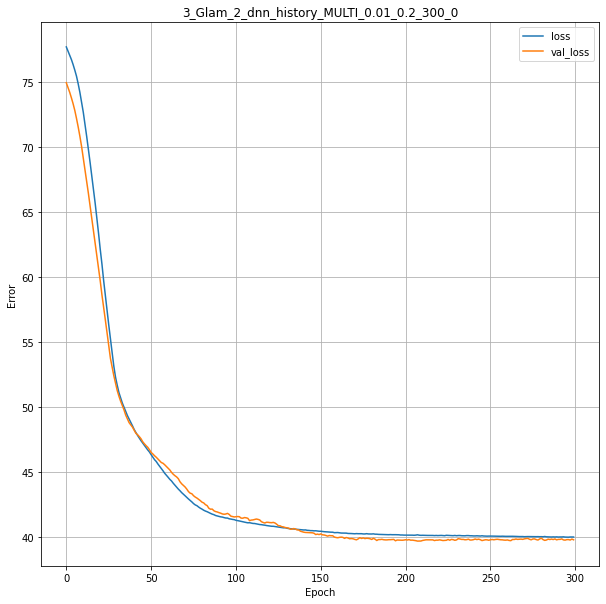

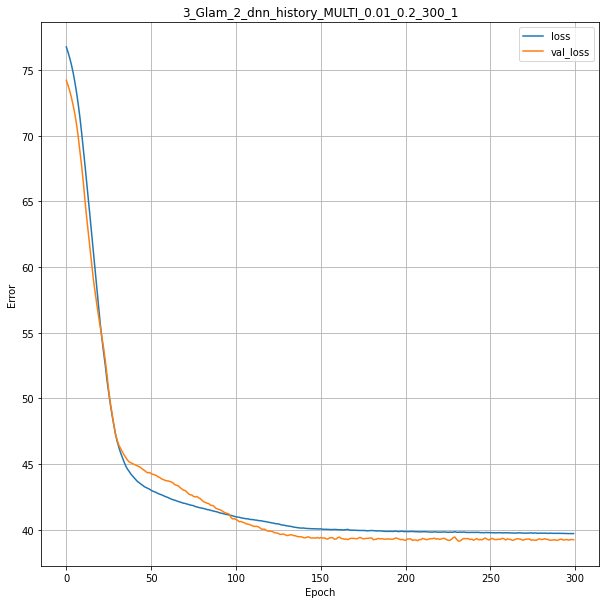

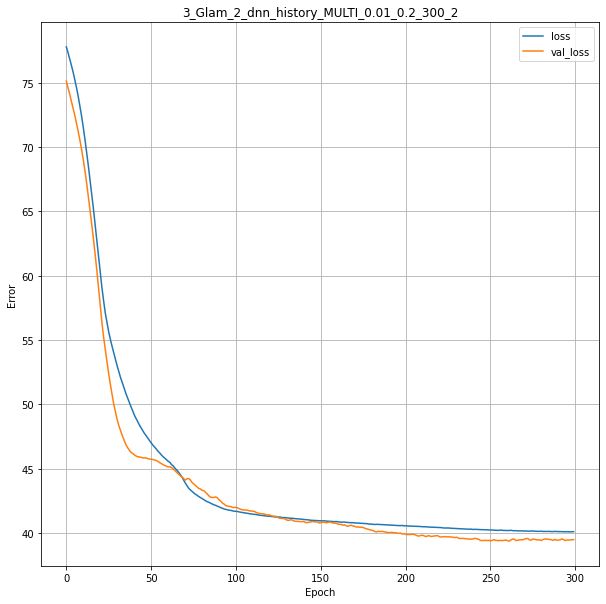

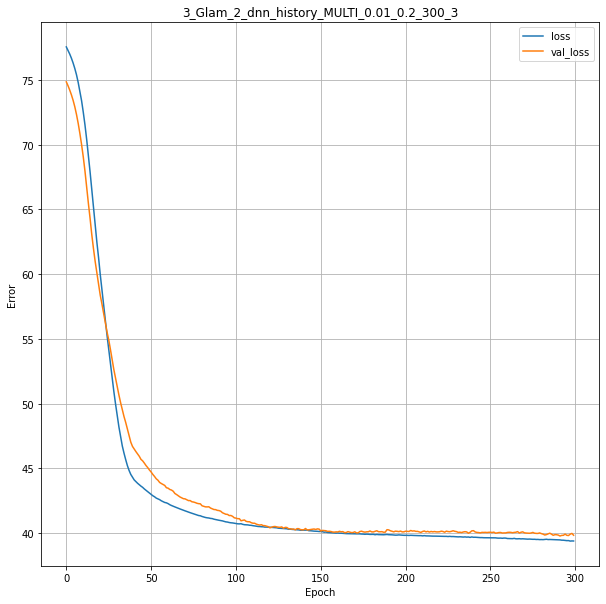

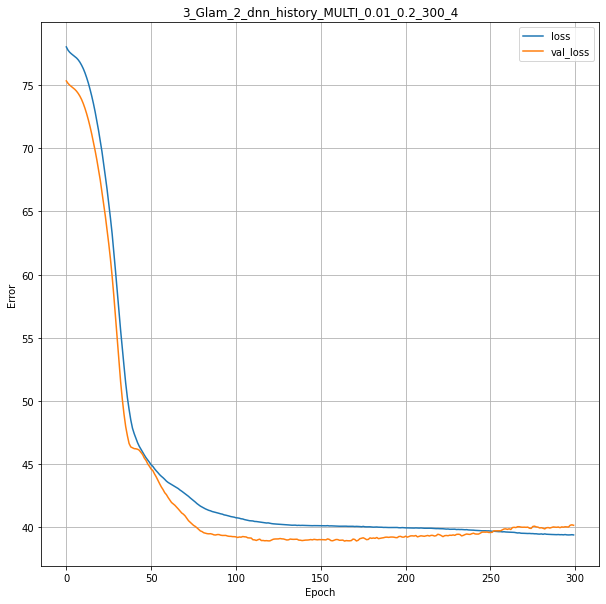

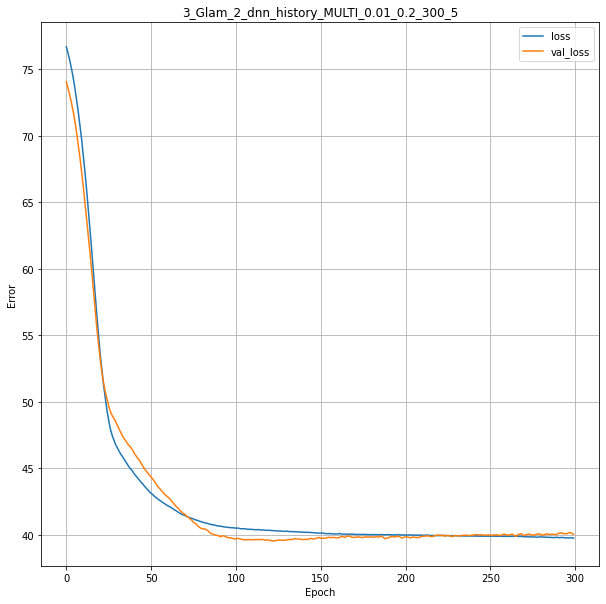

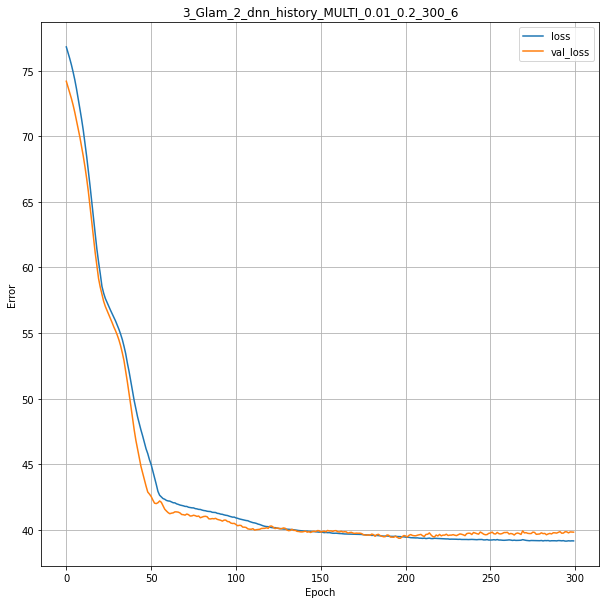

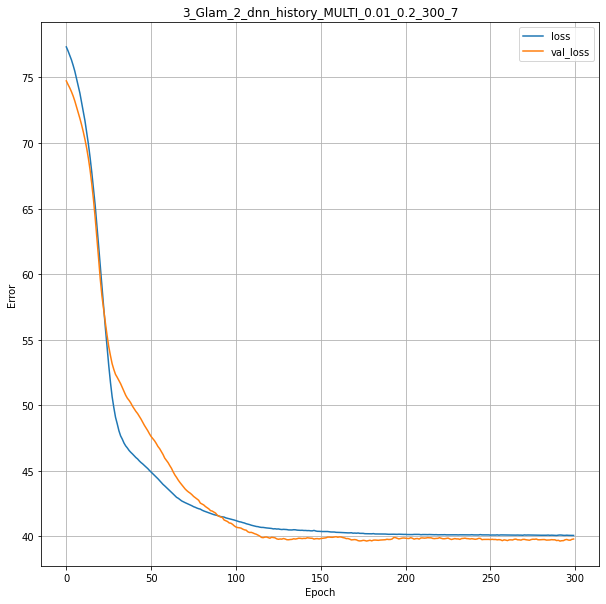

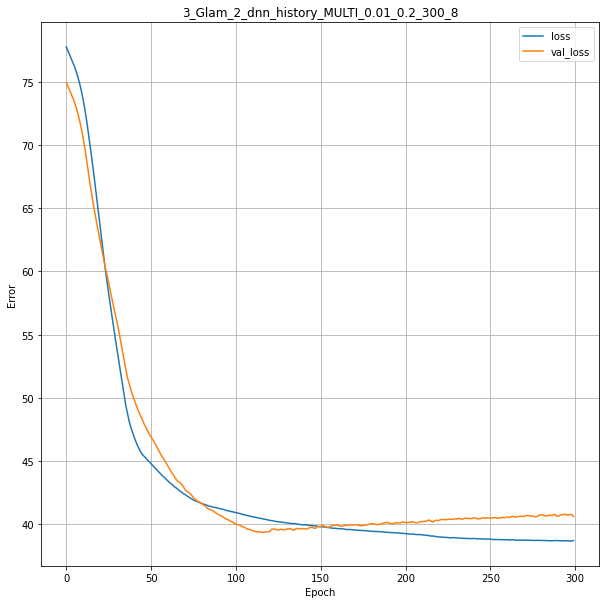

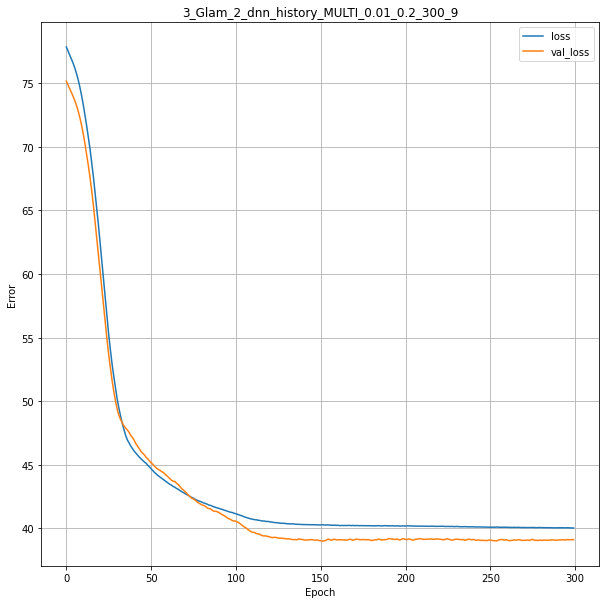

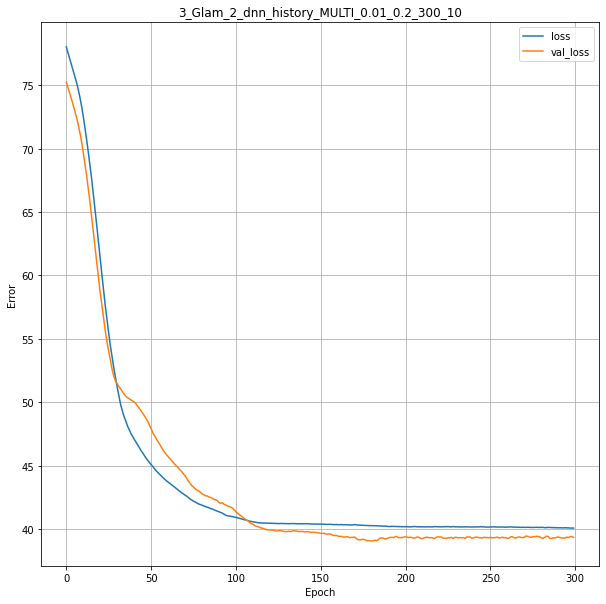

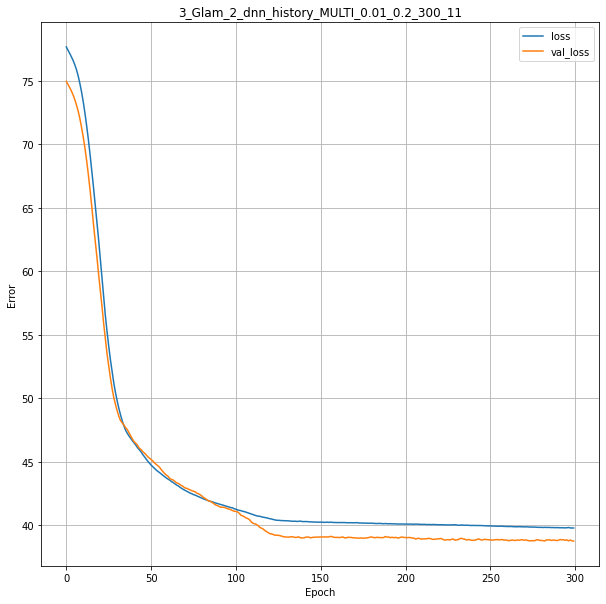

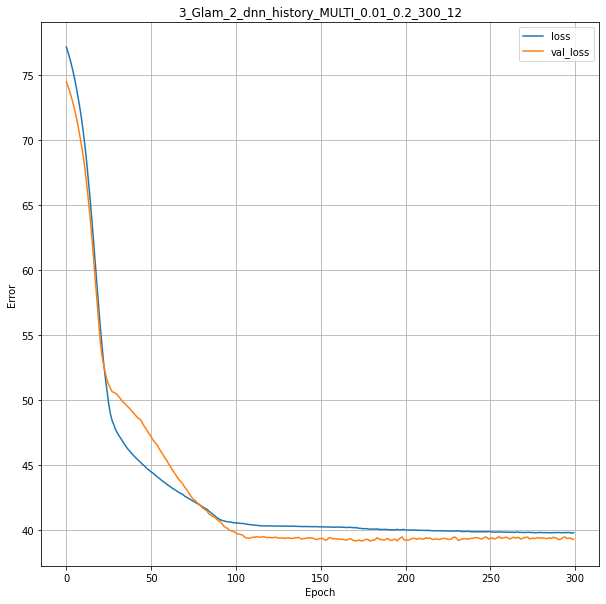

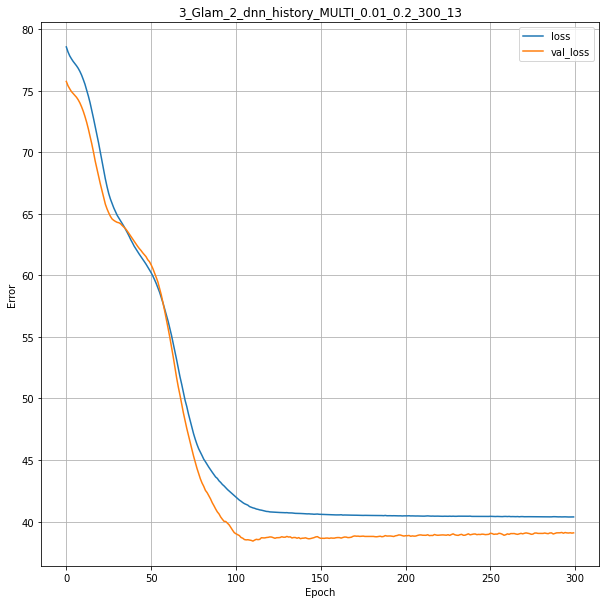

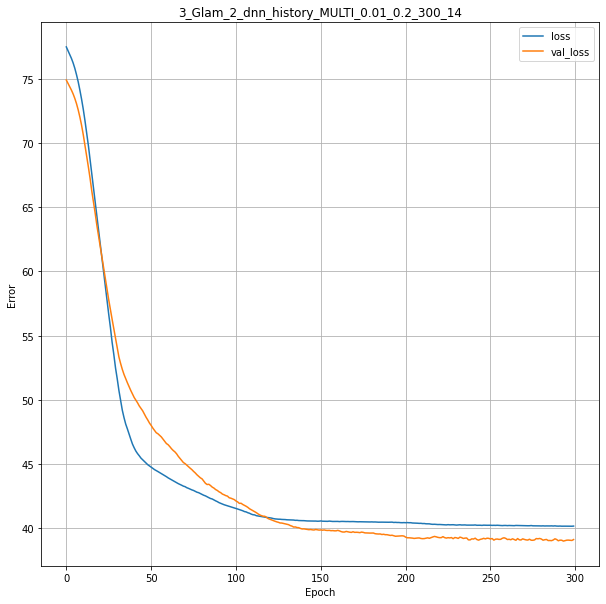

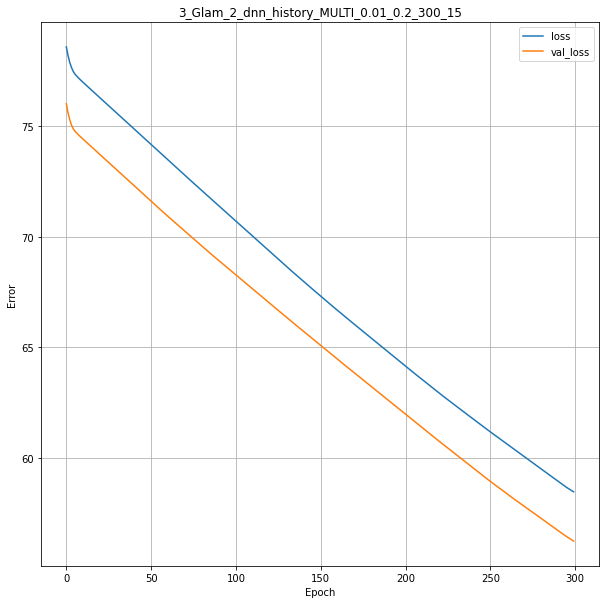

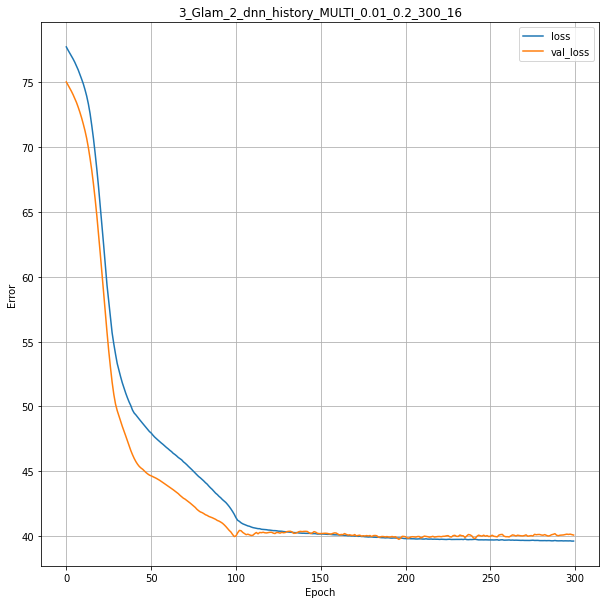

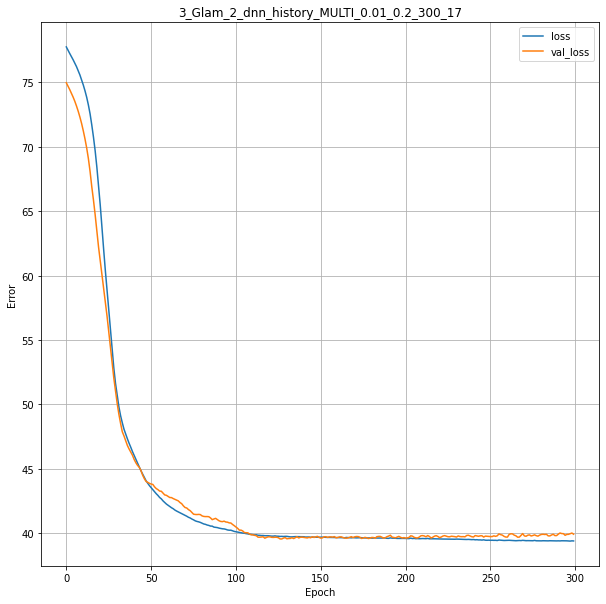

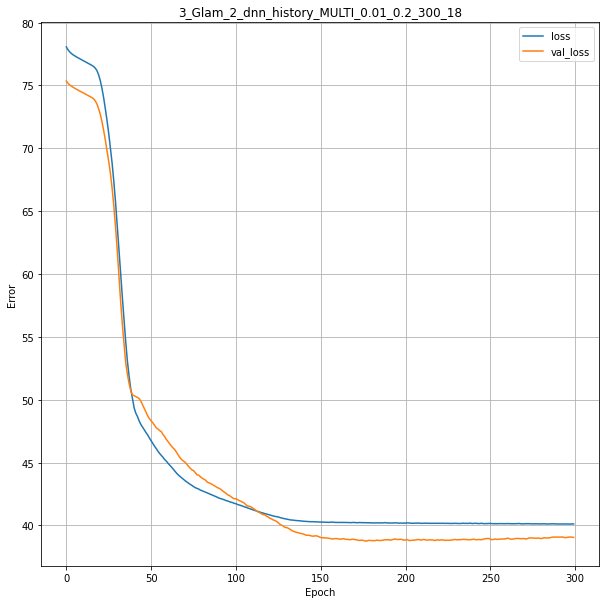

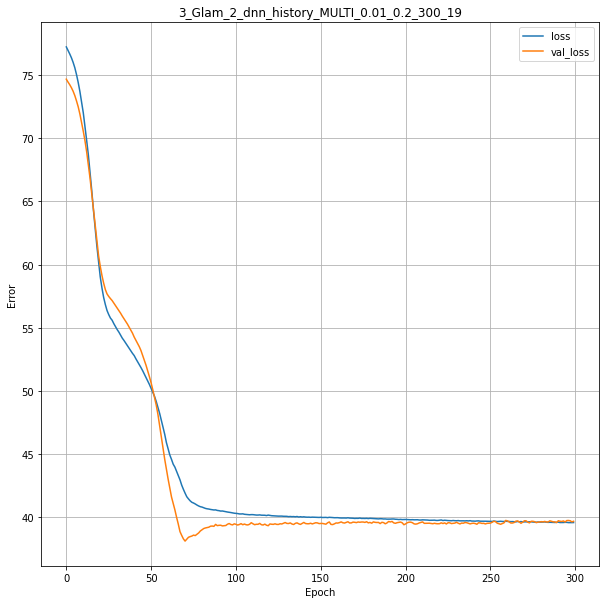

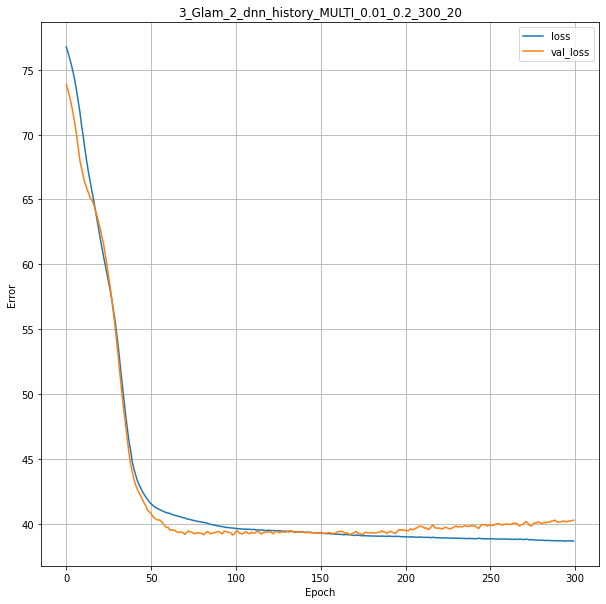

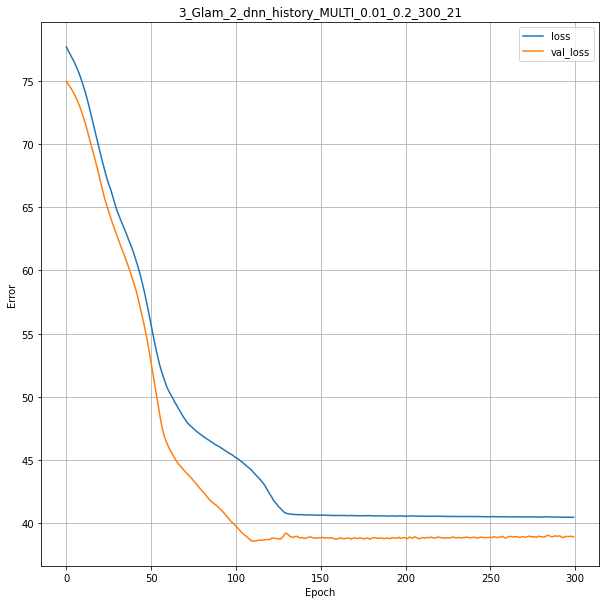

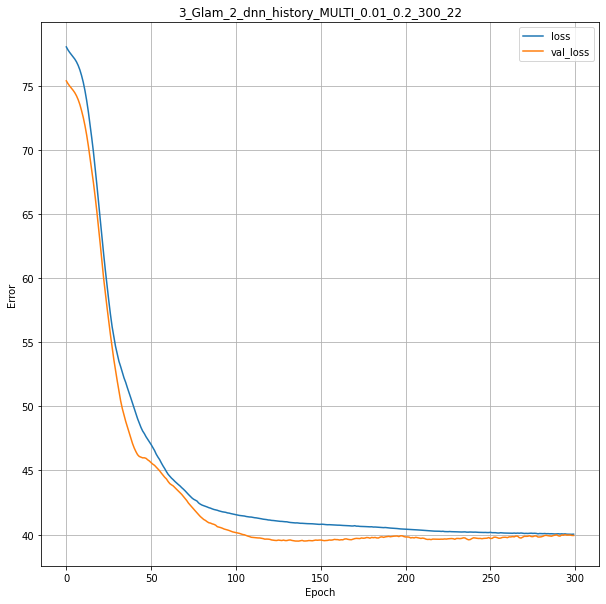

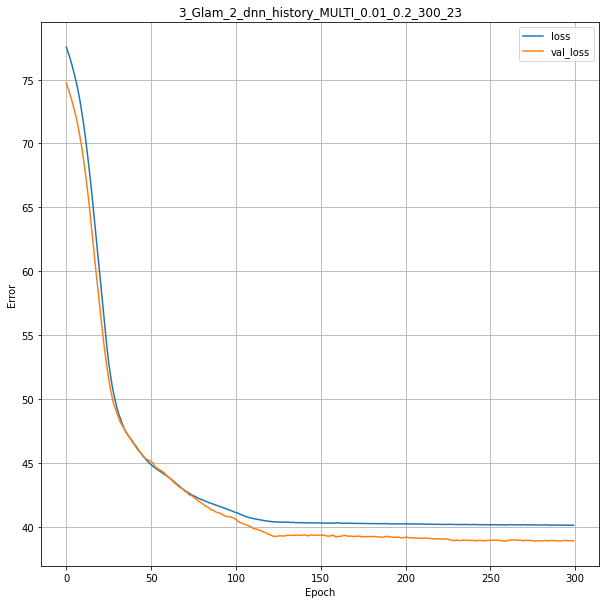

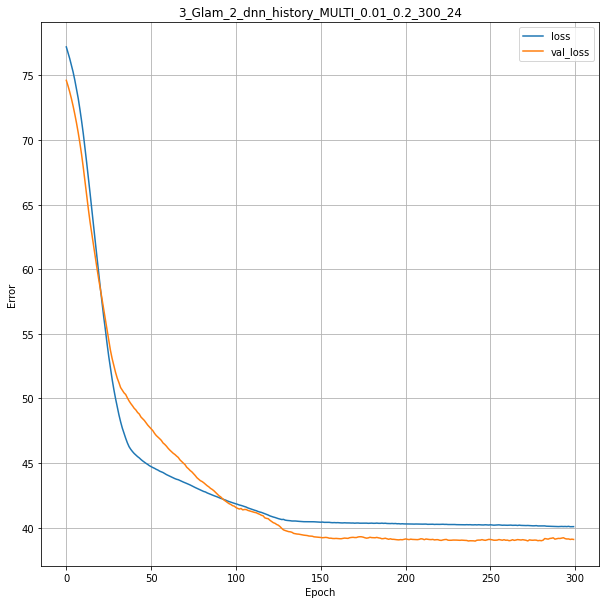

In [593]:
rootdir = 'saved_results/sr5/sr_' + arch + '/'
dnn_history = {}
for rs in RS: 
    dnn_history[
        arch + 
        '_Glam_2_dnn_history_MULTI_0.01_0.2_300_' + 
        str(rs)
    ] = pd.read_csv(
        rootdir + 
        'Glam_2_dnn_history_MULTI_0.01_0.2_300_' +
        str(rs)
    )
#     print(arch + '_Glam_dnn_history_MULTI_0.001_0.2_300_' + str(rs))

for hist in dnn_history:    
    fig,ax=plt.subplots(1,1,figsize=(10,10))
    fig.patch.set_facecolor('w')
    ax.set_title(hist)
    gl.plot_loss(dnn_history[hist])

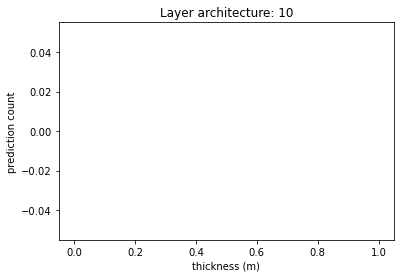

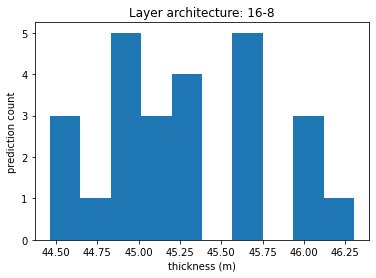

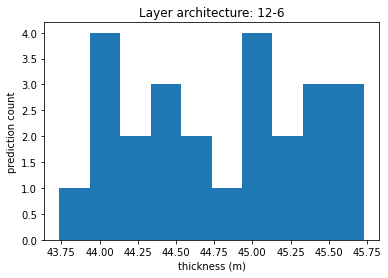

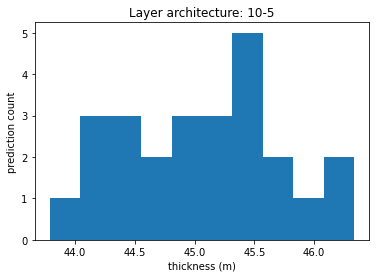

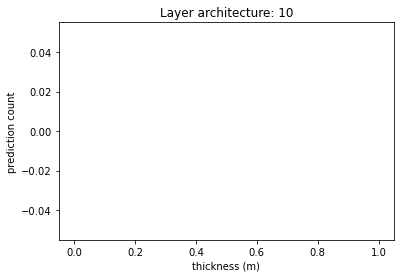

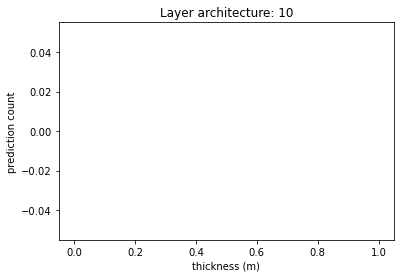

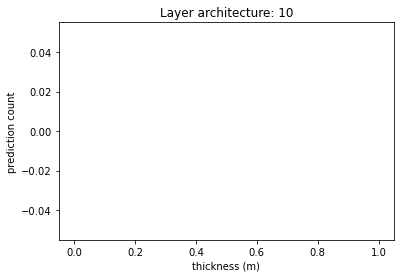

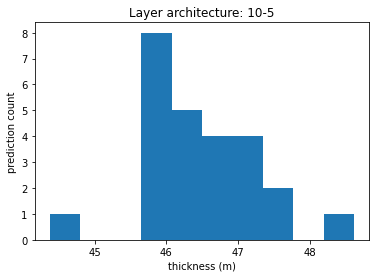

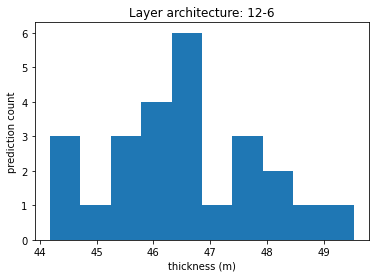

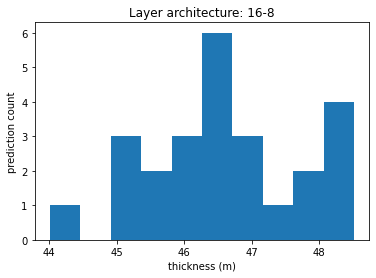

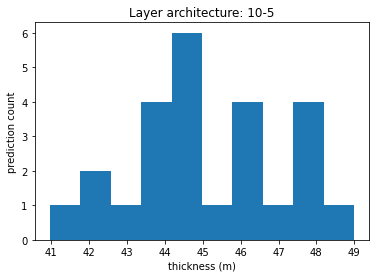

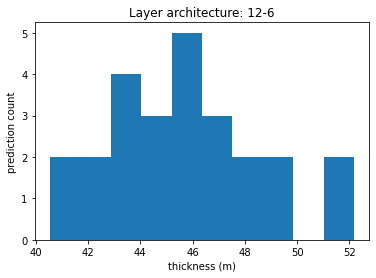

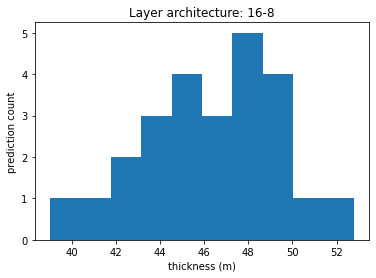

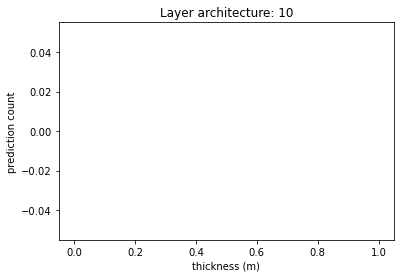

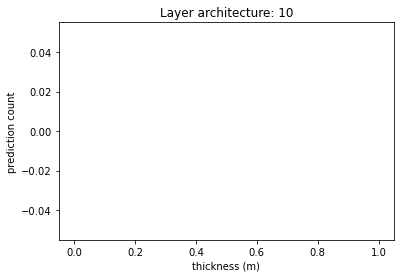

In [583]:
"""
This cell contains code to produce histograms of all the architectures different histories
"""

for i in deviations_Glam_2.index:
#     print(i)
    df = deviations_Glam_2.iloc[i]
    arch = df['layer architecture']
    top_learn_rate = df['learning rate']
    epochs = df['epochs']

    dfs = predictions_Glam[
        (predictions_Glam['architecture'] == arch) &
        (predictions_Glam['learning rate'] == top_learn_rate) &
        (predictions_Glam['epochs'] == epochs)
    ]
    fig,ax = plt.subplots()
    ax.set_title('Layer architecture: ' + arch )
    ax.set_ylabel('prediction count')
    ax.set_xlabel('thickness (m)')
    fig.patch.set_facecolor('w')
    plt.hist(dfs['avg test thickness'])


In [571]:
ccccombo_breaker()
# past this point is under construction. 
# here be monsters

NameError: name 'ccccombo_breaker' is not defined

In [595]:
deviations_Glam_2

,layer architecture,model parameters,learning rate,validation split,epochs,test mae avg,train mae avg,test mae std dev,train mae std dev,test predicted thickness std dev,train predicted thickness std dev
0,10,130.0,0.010,0.2,100,44.656052,39.241180,0.882035,0.454033,1.051852,0.657102
1,16-8,324.0,0.001,0.2,300,44.796826,39.043653,0.756714,0.501870,1.098256,0.707253
2,12-6,224.0,0.001,0.2,300,45.237616,39.519448,0.677299,0.538855,0.972942,0.716392
3,10-5,180.0,0.001,0.2,300,45.425551,39.883456,1.368171,0.497787,1.302878,0.659152
4,32-16-8,1012.0,0.001,0.2,300,45.695327,36.101113,0.964781,0.701673,1.298153,0.749703
5,3,53.0,0.010,0.2,300,45.771124,40.443425,2.393602,3.594722,6.045302,5.459678
6,3,53.0,0.100,0.2,100,45.852460,39.014985,1.149706,0.387202,1.826118,1.069674
7,10,130.0,0.010,0.2,300,46.230012,37.590774,2.499343,1.013992,1.450615,1.011138
8,10,130.0,0.100,0.2,100,47.746317,36.853259,3.033911,0.968356,2.896484,1.778683
9,3,53.0,0.010,0.2,100,47.917638,42.639655,5.093694,6.038691,9.008071,8.108003


In [596]:
fdas = pd.read_csv('GlaThiDa_RGI_matched_indexes.csv')

In [602]:
fdas = fdas.drop_duplicates(subset = ['GlaThiDa_index'])

In [603]:
fdas

,Unnamed: 0,0,GlaThiDa_index,RGI_index
0,0,0.0,1,80565
1,1,0.0,3,45885
3,3,0.0,4,39548
6,6,0.0,5,45912
10,10,0.0,6,43606
...,...,...,...,...
1711,1711,0.0,630,79844
1770,1770,0.0,631,80179
1830,1830,0.0,632,79841
1891,1891,0.0,749,78971


In [ ]:
print('loading RGI...')
rootdir = '/data/fast0/datasets/rgi60-attribs/'
RGI_extra = pd.DataFrame()
for file in tqdm(os.listdir(rootdir)):
    f = pd.read_csv(rootdir+file, encoding_errors = 'replace', on_bad_lines = 'skip')
    RGI_extra = RGI_extra.append(f, ignore_index = True)
    

RGI = RGI_extra[[
    'RGIId',
    'CenLat',
    'CenLon',
    'Slope',
    'Zmin',
    'Zmed',
    'Zmax',
    'Area',
    'Aspect',
    'Lmax'
]]


(sum((df['Area'] * df['avg predicted thickness']) * 10**6) / 10**9)


AIC = deviations_Glam['model parameters'] - deviations_Glam['test mae avg']

AIC.sort_values()

fig,ax = plt.subplots()
fig.patch.set_facecolor('w')
plt.plot(
    deviations_Glam['test predicted thickness std dev'], 
    deviations_Glam['test mae avg'],
    '.',
)

In [ ]:
df = pd.read_csv('zults/predictions_Glam.csv')

In [ ]:
predictions

In [ ]:
dfs

In [ ]:
df

In [ ]:
rootdir = '/data/fast0/datasets/rgi60-attribs/'
RGI_extra = pd.DataFrame()
for file in tqdm(os.listdir(rootdir)):
    f = pd.read_csv(rootdir+file, encoding_errors = 'replace', on_bad_lines = 'skip')
    RGI_extra = RGI_extra.append(f, ignore_index = True)
    

RGI = RGI_extra[[
    'CenLat',
    'CenLon',
    'Slope',
    'Zmin',
    'Zmed',
    'Zmax',
    'Area',
    'Aspect',
    'Lmax'
]]

RGI

In [ ]:
RGI_rejects = pd.concat([
    RGI.loc[RGI.loc[RGI['Zmed']<0].index], 
    RGI.loc[RGI.loc[RGI['Lmax']<0].index], 
    RGI.loc[RGI.loc[RGI['Slope']<0].index],
    RGI.loc[RGI.loc[RGI['Aspect']<0].index]
])

RGI_rejects = RGI_rejects.drop_duplicates()
RGI_rejects

In [ ]:
sum(RGI_rejects['Slope']<0)

In [ ]:
sum(RGI_rejects['Zmin']<0)

In [ ]:
sum(RGI_rejects['Zmed']<0)

In [ ]:
sum(RGI_rejects['Zmax']<0)

In [ ]:
sum(RGI_rejects['Area']<0)

In [ ]:
sum(RGI_rejects['Aspect']<0)

In [ ]:
sum(RGI_rejects['Lmax']<0)

In [ ]:
RGI = RGI.drop(RGI.loc[RGI['Zmed']<0].index)
RGI = RGI.drop(RGI.loc[RGI['Lmax']<0].index)
RGI = RGI.drop(RGI.loc[RGI['Slope']<0].index)
RGI = RGI.drop(RGI.loc[RGI['Aspect']<0].index)
RGI = RGI.reset_index()
RGI = RGI.drop('index', axis=1)

In [ ]:
RGI_back = pd.concat([RGI, RGI_rejects])

In [ ]:
RGI_back

In [ ]:
"""
This is a density plot of the most recent predictions made. Can easily be modified in a loop
to show multiple random states and whatnot
"""
sns.set(rc={"figure.figsize":(15,10)})
sns.kdeplot(x = test_labels, y = y.flatten(),fill = True)
plt.plot((0,300),(0,300),'-')

In [ ]:
# def plot_single_variable(x,y,model_type,model_name,feature_name):
#     y = model_type[model_name].predict(test_labels)
#     plt.scatter(train_features[feature_name], train_labels, label='Data')
#     plt.plot(x, y,'.', color='k', label='Predictions')
#     plt.xlabel(feature_name)
#     plt.ylabel('THICKNESS')
#     plt.legend()
#     plt.plot()

# x = test_labels
# for i, variable_name in enumerate(list(train_features)):
#     ax = plt.subplot(2,2,i+1)
#     model_name = (dataset.name 
#     + '_' 
#     + variable_name 
#     + '_' 
#     + str(lr) 
#     + '_' 
#     + str(vs) 
#     + '_' 
#     + str(ep))
#     plot_single_variable(x,y,dnn_model, model_name,variable_name)
# #     ax.set_ylim([35,140])
# #     ax.set_title(variable_name)
# #     plt.savefig("/home/sa42/notebooks/glac/figs/GTP1_dnn_loss.eps")
# plt.tight_layout()

In [ ]:
"""
This cell computes the true average thickness of the glaciers in use
"""


pth = '/data/fast1/glacierml/T_models/'
T_lab = pd.read_csv(pth + 'T.csv', low_memory = False)
T_lab = T_lab[[
    'GlaThiDa_ID',
    'LAT',
    'LON',
    'AREA',
    'MEAN_SLOPE',
    'MEAN_THICKNESS'
]]
T_lab = T_lab.dropna()

tru_thickness = np.sum(T_lab['MEAN_THICKNESS']) / len(T_lab['MEAN_THICKNESS'])
tru_thickness